In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import nltk as nlp
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk import TweetTokenizer

In [3]:
tokenizer = TweetTokenizer(reduce_len=True)

In [4]:
df = pd.read_csv("/home/ted/Desktop/Project 3/amazon_yelp_twitter2.csv")

In [5]:
df.head()

,sentiment,text
0,1,nearly perfect wheat-free bread mix
1,0,be aware: speakers not as advertised on amazon
2,0,results comedic at best
3,1,going to enjoy the sunshine while its here
4,1,i feel better now.


In [6]:
### Clean the Data and Check for Size

In [7]:
df = df.iloc[:,:2].drop_duplicates()

In [8]:
df2 = df[pd.notnull(df['text'])]

In [9]:
df2.shape

(4486500, 2)

In [10]:
###stopword library - to remove if needed

In [11]:
stopwords = stopwords.words('english')

In [12]:
### Split Sections to explore Sentiment

In [13]:
 df_pos, df_neg = [x for _, x in df.groupby(df['sentiment'] < 1)]

In [14]:
pos_list = df_pos["text"].values
neg_list = df_neg["text"].values

In [15]:
pos_list_str= ''.join(map(str, pos_list))
neg_list_str= ''.join(map(str, neg_list))

In [16]:
### Check for Balance

In [17]:
print(len(pos_list_str),len(neg_list_str))

107792435 104612641


In [18]:
from collections import Counter

In [19]:
pcdf = pd.DataFrame(Counter(pos_list_str.split()).most_common())
pndf = pd.DataFrame(Counter(neg_list_str.split()).most_common())

In [20]:
pcdf.columns = ['word', 'count']
pndf.columns = ['word', 'count']

In [21]:
pcdf2 = pcdf[pcdf['count'] > 1000]
pcdf3 = pcdf2[pcdf2['word'].map(len) > 3]
pndf2 = pndf[pndf['count'] > 1000]
pndf3 = pndf2[pndf2['word'].map(len) > 3]

In [22]:
pcdf4 = pcdf3.head(30)
pndf4 = pndf3.head(30)

In [23]:
print(pcdf4.head(10))

     word   count
12   this  139435
14   with  119710
16   have   96830
17   good   95433
18  great   92198
20   that   88541
23   love   74227
26   book   65989
28   your   64286
30   just   62184


In [24]:
print(pndf4.head(10))

     word   count
12   this  158681
16   have  114086
18   with   97155
21   that   88955
24   like   68306
25   just   66161
33   from   52462
34  don't   51583
35   good   50199
38   your   47602


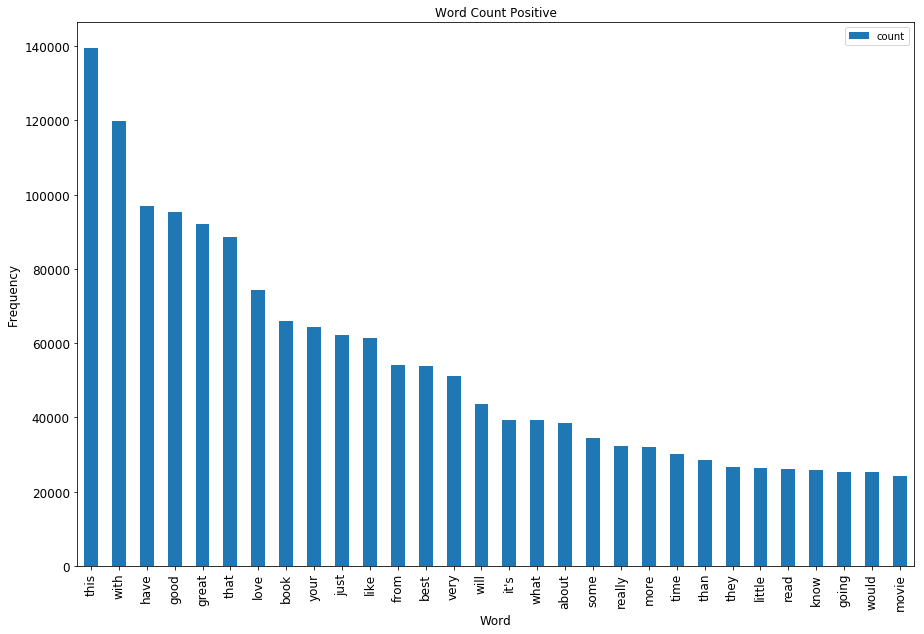

In [25]:
positive = pcdf4.plot(x="word", y="count", kind="bar",title ="Word Count Positive", figsize=(15, 10), legend=True, fontsize=12)
positive.set_xlabel("Word", fontsize=12)
positive.set_ylabel("Frequency", fontsize=12)
plt.show()

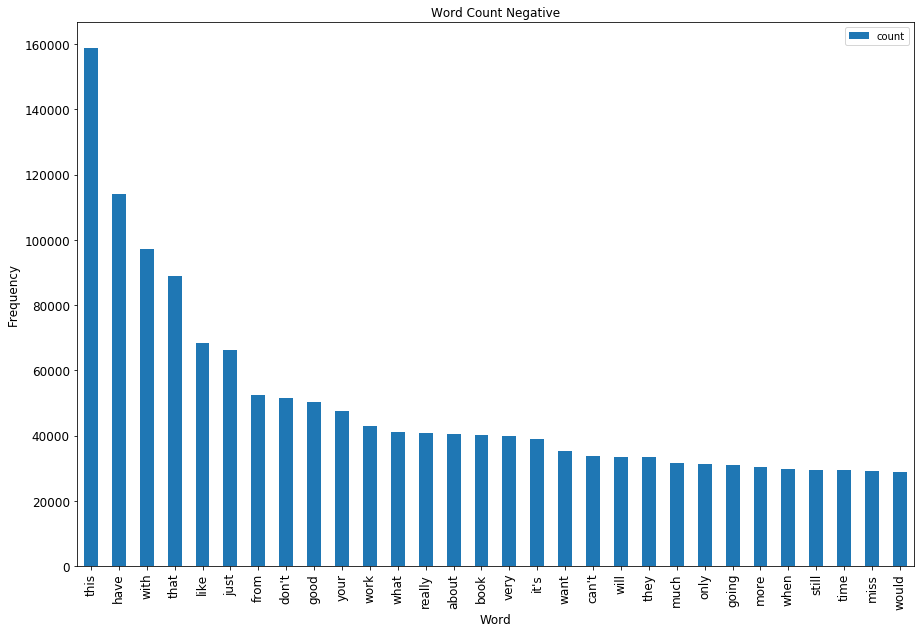

In [26]:
negative = pndf4.plot(x="word", y="count", kind="bar",title ="Word Count Negative", figsize=(15, 10), legend=True, fontsize=12)
negative.set_xlabel("Word", fontsize=12)
negative.set_ylabel("Frequency", fontsize=12)
plt.show()

In [27]:
### Remove Overlapped Words from both sets

In [28]:
df_all = pcdf3.merge(pndf3.drop_duplicates(), on=['word'], 
                   how='left', indicator=True)
df_all.head()

,word,count_x,count_y,_merge
0,this,139435,158681.0,both
1,with,119710,97155.0,both
2,have,96830,114086.0,both
3,good,95433,50199.0,both
4,great,92198,19153.0,both


In [29]:
df_all2 = pd.get_dummies(data=df_all, columns=['_merge'])
df_all2.head()

,word,count_x,count_y,_merge_left_only,_merge_right_only,_merge_both
0,this,139435,158681.0,0,0,1
1,with,119710,97155.0,0,0,1
2,have,96830,114086.0,0,0,1
3,good,95433,50199.0,0,0,1
4,great,92198,19153.0,0,0,1


In [30]:
df_alla = pndf3.merge(pcdf3.drop_duplicates(), on=['word'], 
                   how='left', indicator=True)
df_alla.head()

,word,count_x,count_y,_merge
0,this,158681,139435.0,both
1,have,114086,96830.0,both
2,with,97155,119710.0,both
3,that,88955,88541.0,both
4,like,68306,61423.0,both


In [31]:
df_all2a = pd.get_dummies(data=df_alla, columns=['_merge'])
df_all2a.head()

,word,count_x,count_y,_merge_left_only,_merge_right_only,_merge_both
0,this,158681,139435.0,0,0,1
1,have,114086,96830.0,0,0,1
2,with,97155,119710.0,0,0,1
3,that,88955,88541.0,0,0,1
4,like,68306,61423.0,0,0,1


In [32]:
pcdf5a, pcdf5b = [x for _, x in df_all2.groupby(df_all2['_merge_left_only'] < 1)]

In [33]:
pndf5a, pndf5b = [x for _, x in df_all2.groupby(df_all2a['_merge_left_only'] < 1)]

In [34]:
pmdf5a, pmdf5b = [x for _, x in df_all2.groupby(df_all2['_merge_both'] < 1)]

In [35]:
pmdf6 = pmdf5a.drop(['_merge_left_only','_merge_right_only', '_merge_both'], 1)

In [36]:
pmdf6.head()

,word,count_x,count_y
0,this,139435,158681.0
1,with,119710,97155.0
2,have,96830,114086.0
3,good,95433,50199.0
4,great,92198,19153.0


In [37]:
pmdf6["count"] = pmdf6["count_x"] + pmdf6["count_y"]

In [38]:
pmdf6.sort_values("count", ascending = False, inplace=True)

In [39]:
pmdf7 = pmdf6.drop(['count_x','count_y'], 1)

In [40]:
pmdf8 = pmdf7.head(30)

In [41]:
pmdf8.head()

,word,count
0,this,298116.0
1,with,216865.0
2,have,210916.0
5,that,177496.0
3,good,145632.0


In [42]:
print(pmdf8.head(10))

     word     count
0    this  298116.0
1    with  216865.0
2    have  210916.0
5    that  177496.0
3    good  145632.0
10   like  129729.0
9    just  128345.0
8    your  111888.0
4   great  111351.0
11   from  106550.0


In [43]:
pcdf5a.head()

,word,count_x,count_y,_merge_left_only,_merge_right_only,_merge_both
82,excellent,11667,NaN,1,0,0
178,enjoyed,6101,NaN,1,0,0
225,highly,5012,NaN,1,0,0
345,great.,3243,NaN,1,0,0
356,fantastic,3119,NaN,1,0,0


In [44]:
pcdf6 = pcdf5a.drop(['count_y','_merge_left_only','_merge_right_only', '_merge_both'], 1)

In [45]:
print(pcdf6.head(10))

             word  count_x
82      excellent    11667
178       enjoyed     6101
225        highly     5012
345        great.     3243
356     fantastic     3119
391  introduction     2825
393         value     2822
396     reference     2810
415         solid     2671
417      enjoying     2660


In [46]:
pcdf7 = pcdf6.head(30)

In [47]:
pcdf7.head()

,word,count_x
82,excellent,11667
178,enjoyed,6101
225,highly,5012
345,great.,3243
356,fantastic,3119


In [48]:
print(pcdf7.head(10))

             word  count_x
82      excellent    11667
178       enjoyed     6101
225        highly     5012
345        great.     3243
356     fantastic     3119
391  introduction     2825
393         value     2822
396     reference     2810
415         solid     2671
417      enjoying     2660


In [49]:
pndf6 = pndf5a.drop(['count_x','_merge_left_only','_merge_right_only', '_merge_both'], 1)

In [50]:
pndf6.sort_values("count_y", ascending = False, inplace=True)

In [51]:
pndf7 = pndf6.head(30)

In [52]:
pndf7.head()

,word,count_y
692,poor,20368.0
62,made,12825.0
246,wanna,11554.0
348,left,7980.0
1002,sick,7949.0


In [53]:
print(pndf7.head(10))

         word  count_y
692      poor  20368.0
62       made  12825.0
246     wanna  11554.0
348      left   7980.0
1002     sick   7949.0
576   missing   6950.0
304     guess   6712.0
53      happy   5901.0
153     ready   5790.0
637     didnt   5665.0


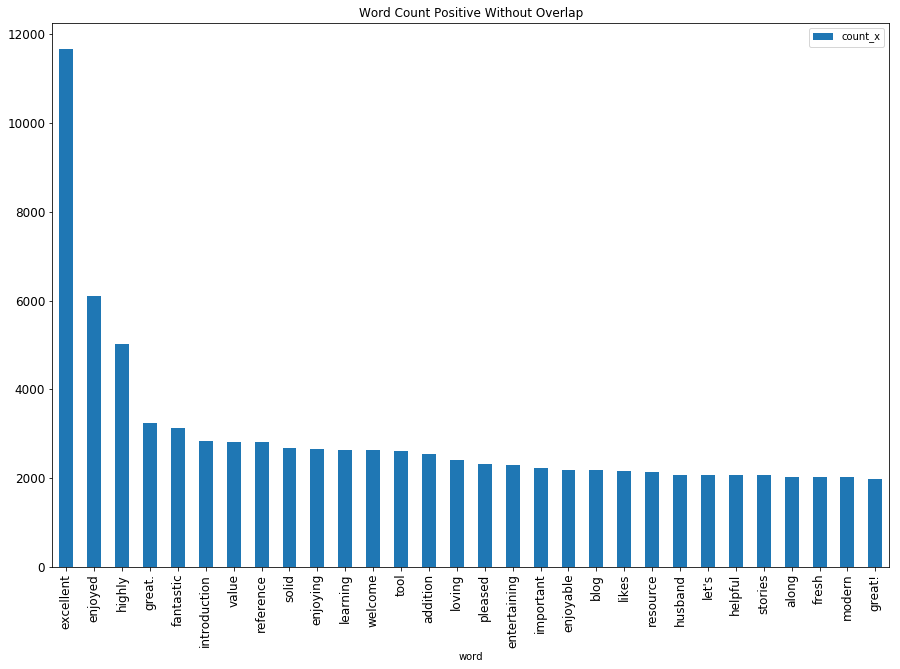

In [54]:
positive2 = pcdf7.plot(x="word", y="count_x", kind="bar",title ="Word Count Positive Without Overlap", figsize=(15, 10), legend=True, fontsize=12)
negative.set_xlabel("Word", fontsize=12)
negative.set_ylabel("Frequency", fontsize=12)
plt.show()

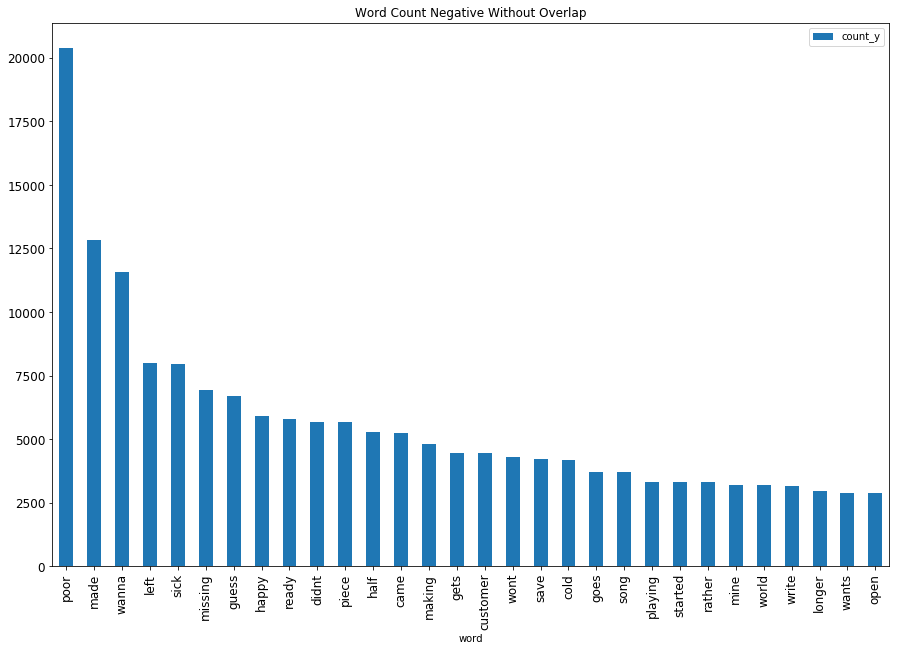

In [55]:
negative2 = pndf7.plot(x="word", y="count_y", kind="bar",title ="Word Count Negative Without Overlap", figsize=(15, 10), legend=True, fontsize=12)
negative.set_xlabel("Word", fontsize=12)
negative.set_ylabel("Frequency", fontsize=12)
plt.show()

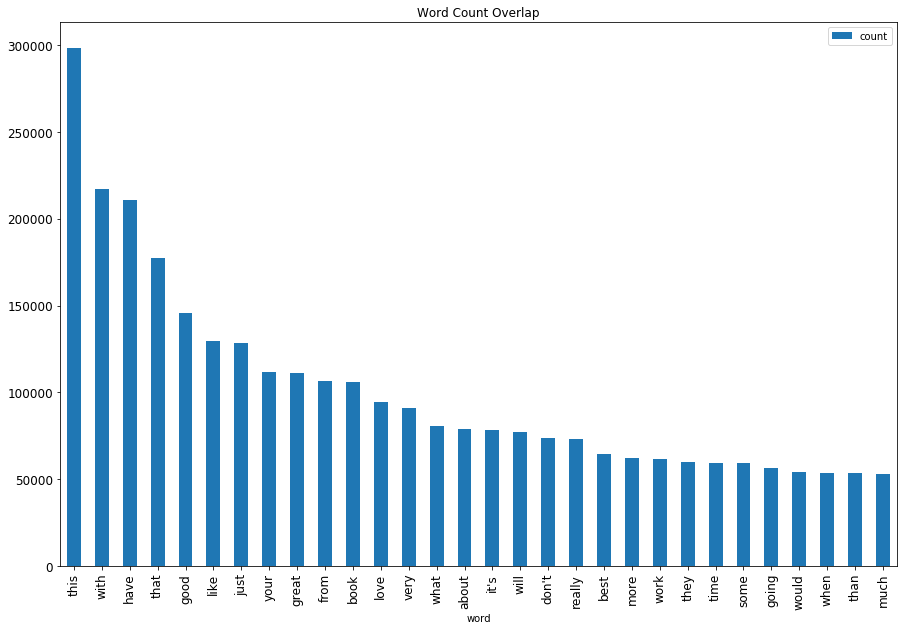

In [56]:
overlap = pmdf8.plot(x="word", y="count", kind="bar",title ="Word Count Overlap", figsize=(15, 10), legend=True, fontsize=12)
negative.set_xlabel("Word", fontsize=12)
negative.set_ylabel("Frequency", fontsize=12)
plt.show()